# Matplotlib statistics

We recommend doing statistical plots with seaborn. However sometimes you will have data coming from an analysis that you will want to plot directly in Matplotlib. We show here some of the basics to do that.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

## Binning with standard deviation bars

Our previous plot of weight vs. carrat we difficult to clearly see because of the number of points. Here we are going to use the complete dataset where the problem is even more drastic:

In [2]:
diams = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/Ecdat/Diamond.csv')

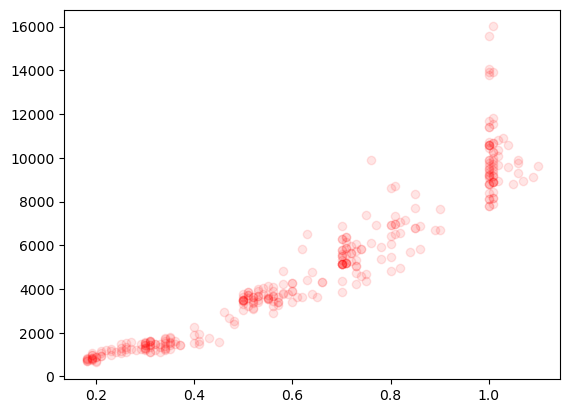

In [3]:
fig, ax = plt.subplots()
ax.plot(diams.carat, diams.price, 'ro', alpha=0.1);

A common way to solve this is to bin the data to "reduce" the number of points. We can do that with the ```scipy.stats.binned_statistic``` function. First we define the bins:

In [4]:
bins = np.arange(0,5,0.1)

Note that if we have ```N``` bins, we have ```N+1``` numbers in ```bins``` which represents the bin edges. Here we have regularly spaced bins so we could easily create another array, but to be more general, we can define bin centers as:

In [5]:
bin_pos = bins[:-1]+np.diff(bins)/2
bin_pos

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05,
       1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05, 2.15,
       2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95, 3.05, 3.15, 3.25,
       3.35, 3.45, 3.55, 3.65, 3.75, 3.85, 3.95, 4.05, 4.15, 4.25, 4.35,
       4.45, 4.55, 4.65, 4.75, 4.85])

Now we can compute our statistics by saying which value ```x``` should be used for binning, and on which value ```values``` to calculate the ```statistic```:

In [6]:
price_mean, _, _ = scipy.stats.binned_statistic(x=diams['carat'], values=diams['price'], statistic='mean', bins=bins)
price_std, _, _ = scipy.stats.binned_statistic(x=diams['carat'], values=diams['price'], statistic='std', bins=bins)
carat_std, _, _ = scipy.stats.binned_statistic(x=diams['carat'], values=diams['carat'], statistic='std', bins=bins)

We can now plot these "summarized" data on top of the original ones, to see if that makes sense:

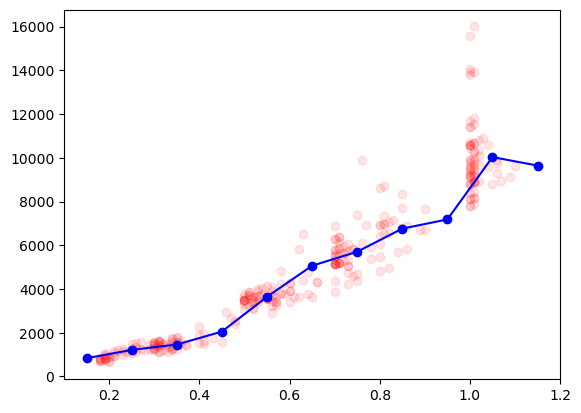

In [7]:
fig, ax = plt.subplots()
ax.plot(diams.carat, diams.price, 'ro', alpha=0.1);
ax.plot(bin_pos, price_mean, 'bo-');

## Adding error bars

To get a feeling of the distribution of our data we can now add error bars corresponding to the standard deviation. For that we use the ```erorrbar``` plotting function. The plotting is done *explicitely*: we have to specify the location and size of all error bars. Like any other plot element we can adjust how it looks, for example here the ```color``` and the size of the caps ```capsize```:

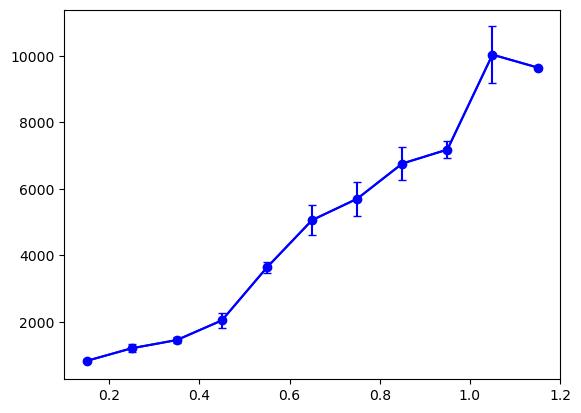

In [8]:
fig, ax = plt.subplots()
ax.plot(bin_pos, price_mean, 'bo-');
ax.errorbar(x=bin_pos, y=price_mean, yerr=price_std/2, color='b', capsize=3);

We can also add error bars for the binned data on the x axis:

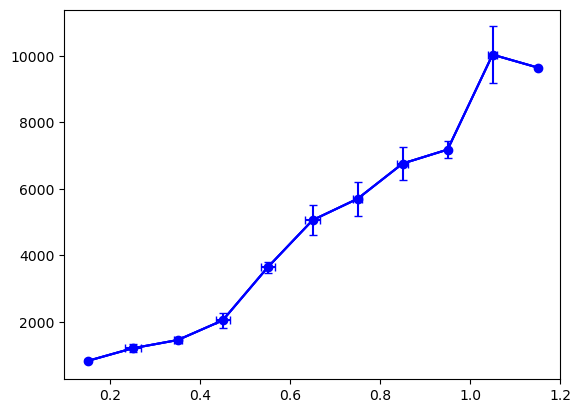

In [9]:
fig, ax = plt.subplots()
ax.plot(bin_pos, price_mean, 'bo-');
ax.errorbar(x=bin_pos, y=price_mean, yerr=price_std/2, color='b', capsize=3);
ax.errorbar(x=bin_pos, y=price_mean, xerr=carat_std/2, color='b', capsize=3);

## Box plots

Another common way of representing binned values is to use a box plot. For that we can use the ```boxplot``` function which takes a list of datasets and turns each into a boxplot. We can create such a list of arrays with a simple comprehension list or an actualy for loop:

In [10]:
colors = diams['colour'].unique()

# example with comprehension list
# grouped_by_color = [diams[diams['color']==c]['price'].values for c in colors]

grouped_by_color = []
for c in colors:
    extracted_color = diams[diams['colour']==c]['price'].values
    grouped_by_color.append(extracted_color)

Now we can create our box plot:

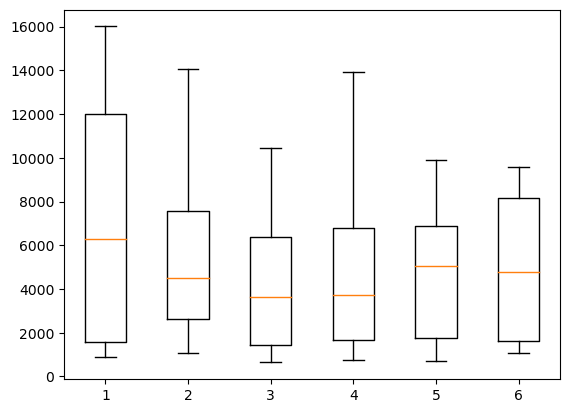

In [11]:
fig, ax = plt.subplots()
ax.boxplot(grouped_by_color);

The x axis labels are not very helpful so we can use the ```set_xticklabels``` function to reset them. We also adjust the look of the boxes using the ```boxprops``` option. Note that these options are not very well documented but you can find very useful examples e.g.g [here]('https://matplotlib.org/3.1.1/gallery/statistics/boxplot.html')
)

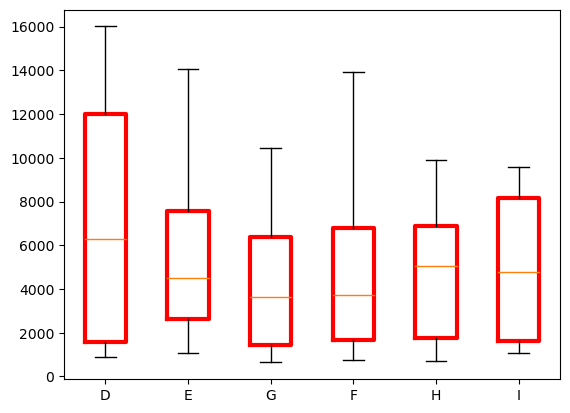

In [12]:
boxprops = dict(linewidth=3, color='red')

fig, ax = plt.subplots()
ax.boxplot(grouped_by_color, boxprops=boxprops)
ax.set_xticklabels(colors);

## Violin plot 

Violin plots are found very commonly in biology. They offer an alternative way of showing the details of a distribution and function like a box plot (note that here we have to explicitely set xticks).

Here again we have options such as ```showmedians``` used here. Note that violinplots are an example of plot type where further customization (e.g. color change) in Matplotlib is quite cumbersome to perform compared to e.g. Seaborn.

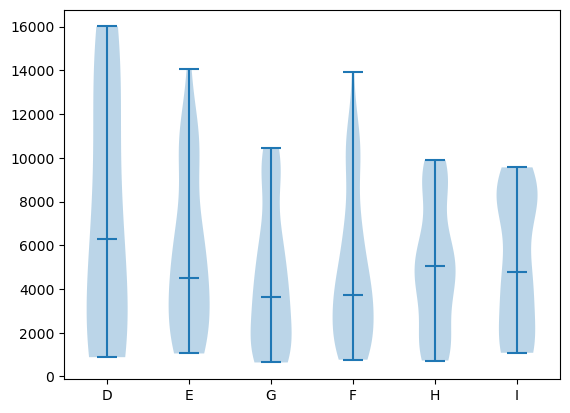

In [13]:
fig, ax = plt.subplots()
ax.violinplot(grouped_by_color, showmedians=True);
ax.set_xticks(np.arange(1,7))
ax.set_xticklabels(colors);

## Exercise

1. In the penguin data, select one species and plot the bill length as a function of weigth.
2. Create a binned dataset using ```scipy.stats.binned_statistic``` and add the result to the plot with error bars corresponding to standard deviation, reproducing the plot below.

In case your run into trouble you migth have to clean-up the data by removing NaN values.

![](https://github.com/guiwitz/ISDAwPython_day2/raw/master/plots/ex_13_1.png)

In [ ]:
penguins = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')